In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
full = cv2.imread('Computer-Vision-with-Python/DATA/sammy.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

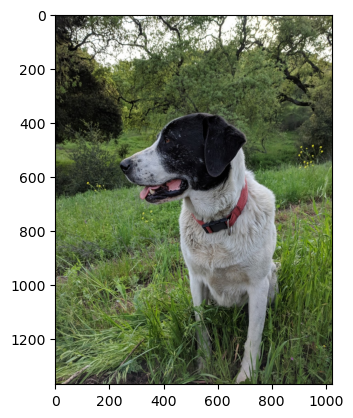

In [7]:
plt.imshow(full)

In [11]:
full.shape

(1367, 1025, 3)

In [8]:
face = cv2.imread('Computer-Vision-with-Python/DATA/sammy_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

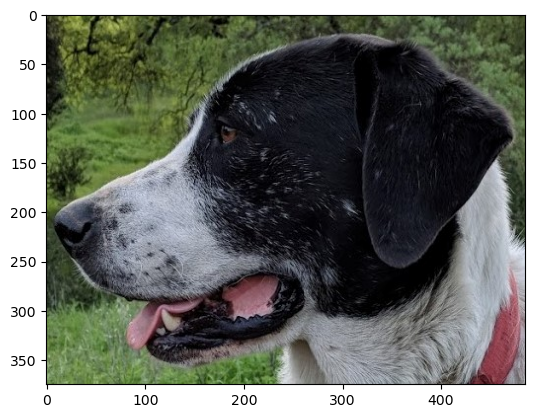

In [9]:
plt.imshow(face)

In [10]:
face.shape

(375, 486, 3)

In [12]:
sum([1,2,3])

6

In [13]:
mystring = 'sum'

In [14]:
eval(mystring)

<function sum(iterable, /, start=0)>

In [15]:
myfunc = eval(mystring)

In [16]:
myfunc([1,2,3])

6

In [17]:
# eval Function Evaluating String for a function call

# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']


In [21]:
full_copy = full.copy()
my_method = eval('cv2.TM_CCOEFF')
res = cv2.matchTemplate(full_copy, face, my_method)

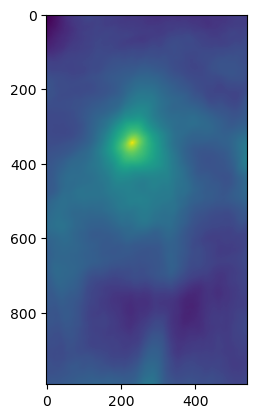

In [22]:
plt.imshow(res)

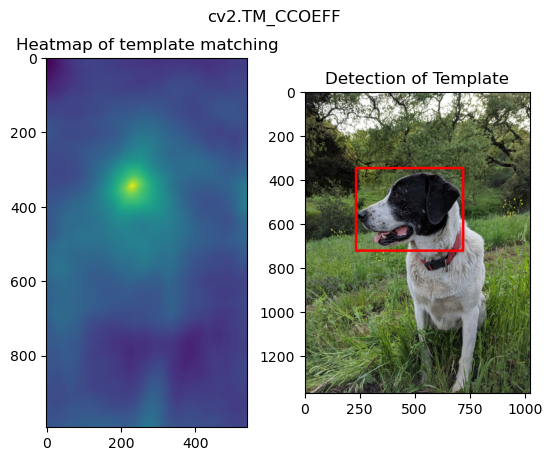

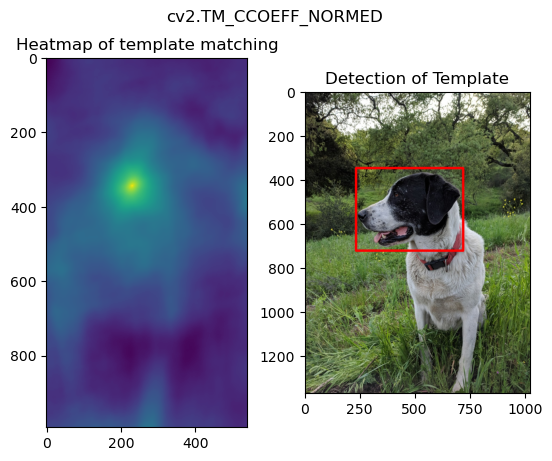

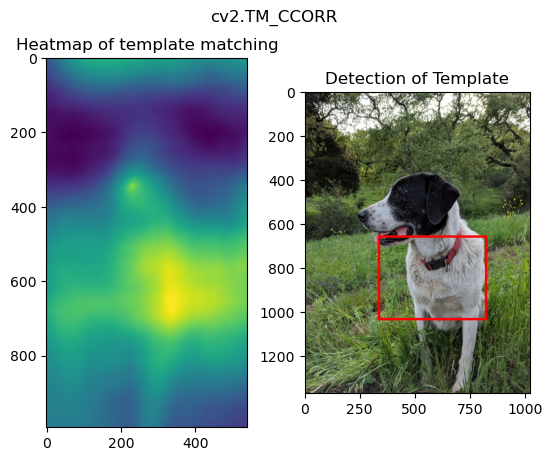

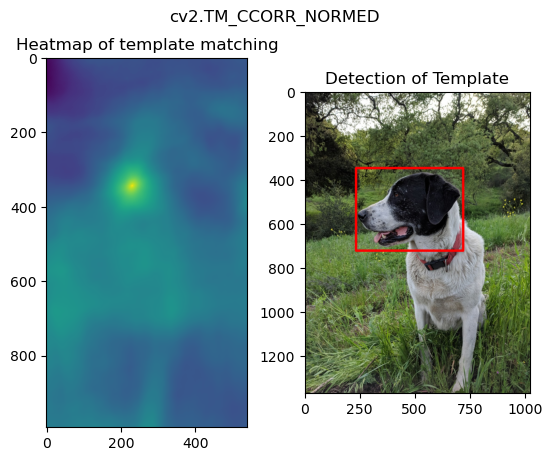

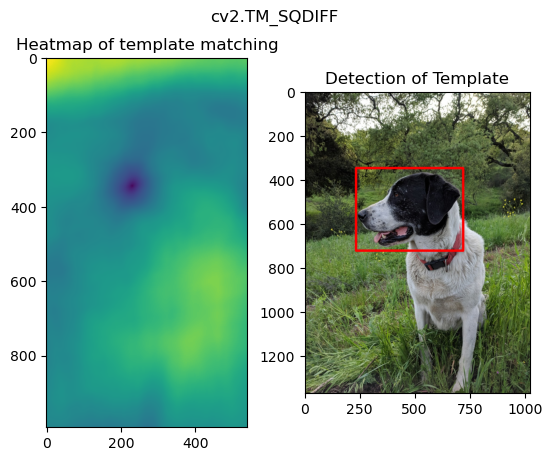

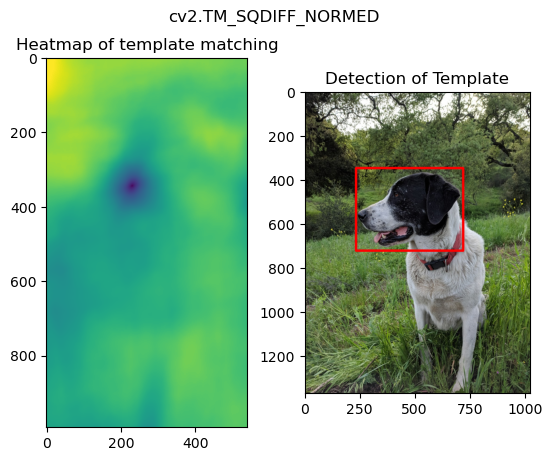

In [25]:
for m in methods:
    # Create a copy of the full image
    full_copy = full.copy()

    method = eval(m)
    
    # Template Mathching
    res = cv2.matchTemplate(full_copy, face, method)

    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    height, width, channels = face.shape

    bottom_right = (top_left[0] + width, top_left[1] + height)

    cv2.rectangle(full_copy, top_left,bottom_right,(255,0,0),10)

    # Plot and show the image
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Heatmap of template matching')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detection of Template')
    # Title with the method usesd
    plt.suptitle(m)

    plt.show()

    print('\n')
    print('\n')